## To implement Random Forest Classifier

* The random forest is a classification algorithm consisting of many decisions trees.
* It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

#### 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. The dataset is imported using the pandas library. It is imported in a dataframe from the data.csv file

The dataset that I have selected contains 24 features (or attributes) and 194 rows (or instances). It is composed of biomedical voice measurements from 31 people, out of which 23 have Parkinson's Disease.
* Each column is a particular voice measure
* Each row corresponds to the voice recordings of these individuals
* The aim here is to segregate healthy people from the people having Parkinson's Disease using the 'status' column which is set to '0' for healthy people and '1' for people with Parkinson

In [2]:
dataset = pd.read_csv('data.csv')
dataset=dataset.drop(['name'],axis=1)
x=dataset.iloc[:,:-1].values
y=dataset.loc[:,'status'].values

#### 3. Splitting our dataset into Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 9)

- we can check how our training and testing data look after splitting

In [4]:
x

array([[1.199920e+02, 1.573020e+02, 7.499700e+01, ..., 2.664820e-01,
        2.301442e+00, 2.846540e-01],
       [1.224000e+02, 1.486500e+02, 1.138190e+02, ..., 3.355900e-01,
        2.486855e+00, 3.686740e-01],
       [1.166820e+02, 1.311110e+02, 1.115550e+02, ..., 3.111730e-01,
        2.342259e+00, 3.326340e-01],
       ...,
       [1.746880e+02, 2.400050e+02, 7.428700e+01, ..., 1.584530e-01,
        2.679772e+00, 1.317280e-01],
       [1.987640e+02, 3.969610e+02, 7.490400e+01, ..., 2.074540e-01,
        2.138608e+00, 1.233060e-01],
       [2.142890e+02, 2.602770e+02, 7.797300e+01, ..., 1.906670e-01,
        2.555477e+00, 1.485690e-01]])

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [6]:
x_train

array([[1.088070e+02, 1.346560e+02, 1.028740e+02, ..., 2.055580e-01,
        1.986899e+00, 3.167000e-01],
       [1.104530e+02, 1.276110e+02, 1.055540e+02, ..., 3.220440e-01,
        2.631793e+00, 2.283190e-01],
       [1.574470e+02, 1.632670e+02, 1.496050e+02, ..., 1.805280e-01,
        2.344348e+00, 1.649160e-01],
       ...,
       [2.142890e+02, 2.602770e+02, 7.797300e+01, ..., 1.906670e-01,
        2.555477e+00, 1.485690e-01],
       [1.482720e+02, 1.649890e+02, 1.422990e+02, ..., 8.784000e-02,
        2.344336e+00, 1.864890e-01],
       [1.381450e+02, 1.972380e+02, 8.111400e+01, ..., 8.716500e-02,
        1.821297e+00, 2.140750e-01]])

In [7]:
x_test

array([[1.468450e+02, 2.087010e+02, 8.173700e+01, ..., 1.961020e-01,
        2.314209e+00, 1.629990e-01],
       [1.983830e+02, 2.152030e+02, 1.931040e+02, ..., 1.751810e-01,
        1.512275e+00, 9.632000e-02],
       [1.877330e+02, 2.023240e+02, 1.730150e+02, ..., 2.668920e-01,
        2.382544e+00, 1.606910e-01],
       ...,
       [1.202670e+02, 1.372440e+02, 1.148200e+02, ..., 2.576820e-01,
        1.854785e+00, 2.117560e-01],
       [1.381900e+02, 2.035220e+02, 8.334000e+01, ..., 1.602670e-01,
        2.090438e+00, 2.298920e-01],
       [2.026320e+02, 5.657400e+02, 1.772580e+02, ..., 2.622810e-01,
        2.910213e+00, 2.701730e-01]])

In [8]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [9]:
y_test

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1], dtype=int64)

#### 4. Using StandardScalar for preprocessing after splitting the data

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 5. Importing RandomForest classifier and fitting the classifier on the training data

In [11]:
from sklearn.ensemble import RandomForestClassifier
#Create a Random Forest classifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state = 0)
#Train the model using the training sets
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### 6. Predict the output using the .predict() method provided by sklearn

In [12]:
preds=classifier.predict(x_test)
preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1], dtype=int64)

#### 7. Import classification report, accuracy score and confusion matrix to view the results

In [13]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, plot_confusion_matrix

* Print the <b>confusion matrix</b>

In [14]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[ 9  4]
 [ 2 34]]


Confusion matrix, without normalization
[[ 9  4]
 [ 2 34]]
Normalized confusion matrix
[[0.69230769 0.30769231]
 [0.05555556 0.94444444]]


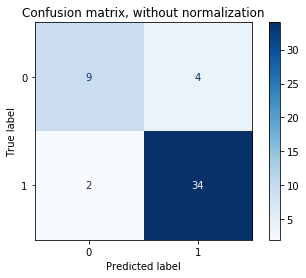

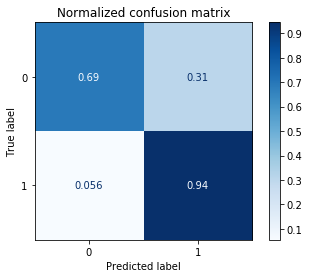

In [15]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

This means that using Random Forest, 43 predictions were correct whereas 6 predictions were incorrect

* Print the <b>classification report</b>

In [16]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.89      0.94      0.92        36

    accuracy                           0.88        49
   macro avg       0.86      0.82      0.83        49
weighted avg       0.87      0.88      0.87        49



* Print the <b>accuracy</b>

In [17]:
print('Accuracy using Random Forest Classifier:',accuracy_score(y_test.tolist(), preds.tolist())*100)

Accuracy using Random Forest Classifier: 87.75510204081633


Therefore it can be seen that the accuracy is 87.75%